### Computer Vision 


In [1]:
import torch
from torch import nn 
import torchvision 
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt 
device="cuda"if torch.cuda.is_available() else "cpu"
print(f" Pytorch version{torch.__version__}")
print(f"Pytorch vision image{torchvision.__version__}")

 Pytorch version2.9.1+cpu
Pytorch vision image0.24.1+cpu


In [2]:
train_data=datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None

)
test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26.4M/26.4M [00:46<00:00, 574kB/s] 
100%|██████████| 29.5k/29.5k [00:00<00:00, 1.03MB/s]
100%|██████████| 4.42M/4.42M [00:04<00:00, 958kB/s] 
100%|██████████| 5.15k/5.15k [00:00<00:00, 13.3MB/s]


In [3]:
image,label=train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [4]:
image.shape

torch.Size([1, 28, 28])

In [5]:
print(len(train_data.data),"\n")
print(len(train_data.targets),"\n")

print(len(test_data.data),"\n")
print(len(test_data.targets),"\n")

60000 

60000 

10000 

10000 



In [6]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

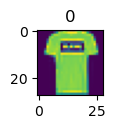

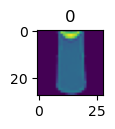

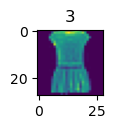

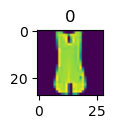

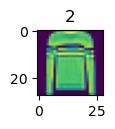

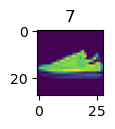

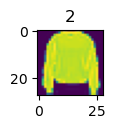

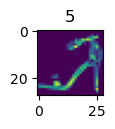

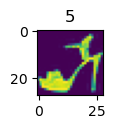

In [7]:
import numpy as np
from numpy import arange


for i in arange(1,10):
    plt.figure(figsize=(10,10))
    plt.subplot(10,1,i)
    image,label=train_data[i]
    plt.imshow(image.squeeze())
    plt.title(label)



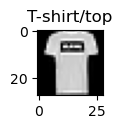

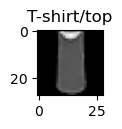

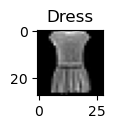

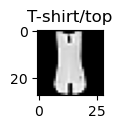

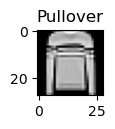

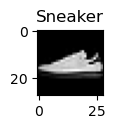

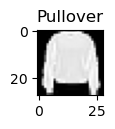

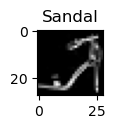

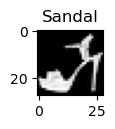

In [8]:
for i in arange(1,10):
    plt.figure(figsize=(10,10))
    plt.subplot(10,1,i)
    image,label=train_data[i]
    plt.imshow(image.squeeze(),cmap="gray")
    plt.title(class_names[label])




In [12]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

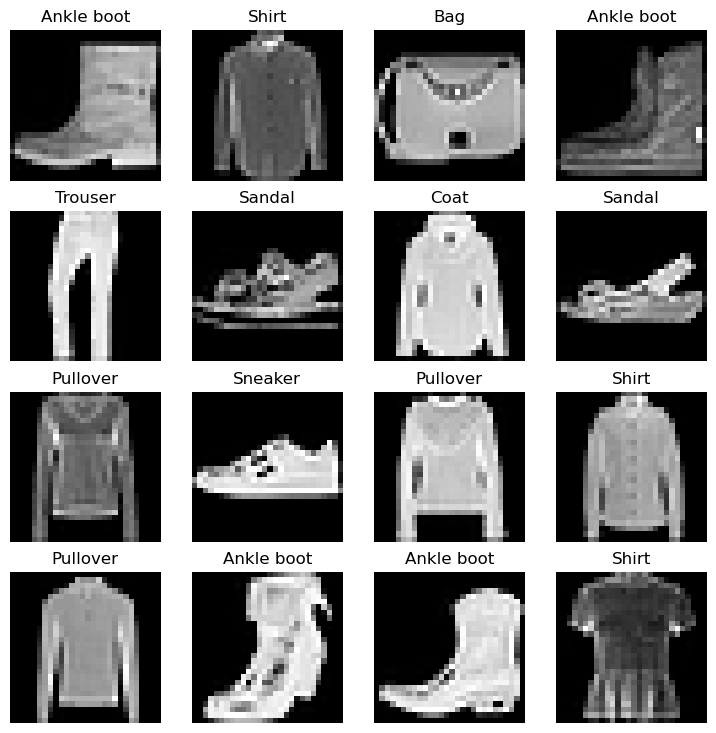

In [9]:
torch.manual_seed(42)
fig=plt.figure(figsize=(9,9))
rows,cols=4,4
for i in range(1,rows*cols+1):
    random_idx=torch.randint(0,len(train_data),size=[1]).item()
    image,label=train_data[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(image.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);


Data Loader


In [13]:
from torch.utils.data import DataLoader
BATCH_SIZE=32
train_dataloader=DataLoader(train_data,batch_size=BATCH_SIZE,shuffle=True)
test_dataloader=DataLoader(test_data,batch_size=BATCH_SIZE,shuffle=False)

In [14]:
print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x00000227CB182D50>, <torch.utils.data.dataloader.DataLoader object at 0x00000227C9C66060>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


Model 0 Build a baseline model 

In [18]:
flatten_model=nn.Flatten()
x=train_features_batch[0]
output=flatten_model(x)
print(f"shape before flattening{x.shape}")
print(f"shape after flattening{output.shape}")

shape before flatteningtorch.Size([1, 28, 28])
shape after flatteningtorch.Size([1, 784])


In [ ]:
from torch import nn 
class FashionMNISTModelV0(nn.Module):
    